In [3]:
# Cell 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Cell 2: Load cocktail data
data_file = '../data/processed/clustered_cocktail_dataset.json'
cocktails = pd.read_json(data_file)

# Display the first few rows of the dataframe
cocktails.head()


,id,name,category,glass,tags,alcoholic,ingredients,one_hot_tags,kmeans_cluster,agg_cluster
0,11000,Mojito,Cocktail,Highball glass,"[Hangover, Citrus, Cold, Summer, Fruity]",1,"[{'id': 170, 'name': 'Soda water', 'alcohol': ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...",27,16
1,11001,Old Fashioned,Cocktail,Old-fashioned glass,"[USA, StrongFlavor]",1,"[{'id': 513, 'name': 'Water', 'alcohol': 0, 't...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...",17,19
2,11002,Long Island Tea,Ordinary Drink,Highball glass,"[USA, Brunch, Strong]",1,"[{'id': 305, 'name': 'Light Rum', 'alcohol': 1...","[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, ...",26,28
3,11003,Negroni,Ordinary Drink,Old-fashioned glass,"[StrongFlavor, DinnerParty, Strong]",1,"[{'id': 482, 'name': 'Sweet Vermouth', 'alcoho...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, ...",3,12
4,11004,Whiskey Sour,Ordinary Drink,Old-fashioned glass,"[USA, Vegetarian, Mild, Strong, Fruity]",1,"[{'id': 409, 'name': 'Powdered Sugar', 'alcoho...","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, ...",22,6


In [5]:

# Cell 3: Set visualization style
sns.set(style='whitegrid')



C:\Users\Marcel\AppData\Local\Temp\ipykernel_3884\4241755082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cocktails, x='kmeans_cluster', palette='Set2')


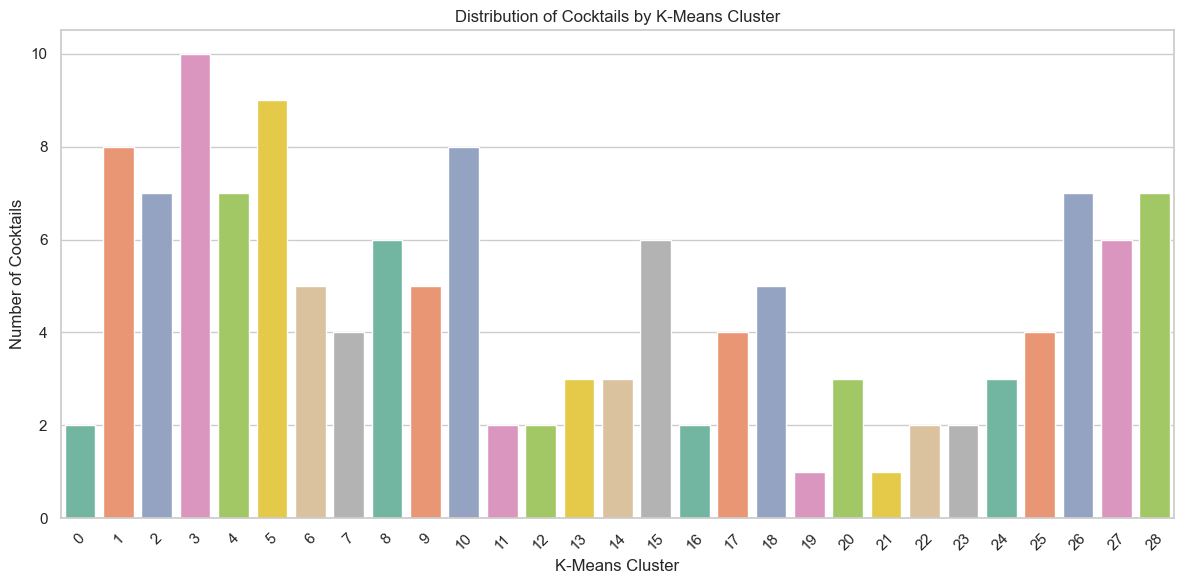

In [6]:
# Cell 4: Visualize the distribution of cocktails by K-Means cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=cocktails, x='kmeans_cluster', palette='Set2')
plt.title('Distribution of Cocktails by K-Means Cluster')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Cocktails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Marcel\AppData\Local\Temp\ipykernel_3884\472353093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cocktails, x='agg_cluster', palette='Set1')


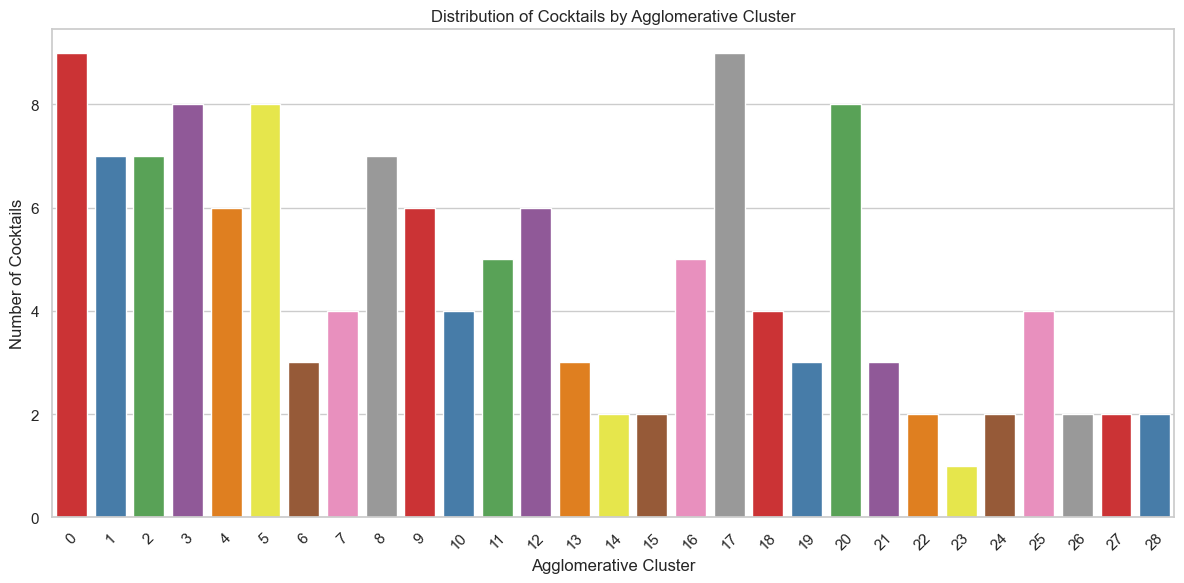

In [7]:

# Cell 5: Visualize the distribution of cocktails by Agglomerative cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=cocktails, x='agg_cluster', palette='Set1')
plt.title('Distribution of Cocktails by Agglomerative Cluster')
plt.xlabel('Agglomerative Cluster')
plt.ylabel('Number of Cocktails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [8]:
# Cell 6: Display cocktails within each cluster (optional)
cluster_id = 0  # Example cluster ID, can be changed to visualize different clusters
selected_cluster = cocktails[cocktails['kmeans_cluster'] == cluster_id]
print(f"Cocktails in K-Means Cluster {cluster_id}:")
print(selected_cluster[['name', 'tags']])



Cocktails in K-Means Cluster 0:
                     name                                               tags
49  Classic Old-Fashioned                              [USA, Citrus, Fruity]
53         Brandy Cobbler  [Hangover, USA, Citrus, Vegetarian, Cold, Chri...


<Axes: xlabel='kmeans_cluster', ylabel='agg_cluster'>

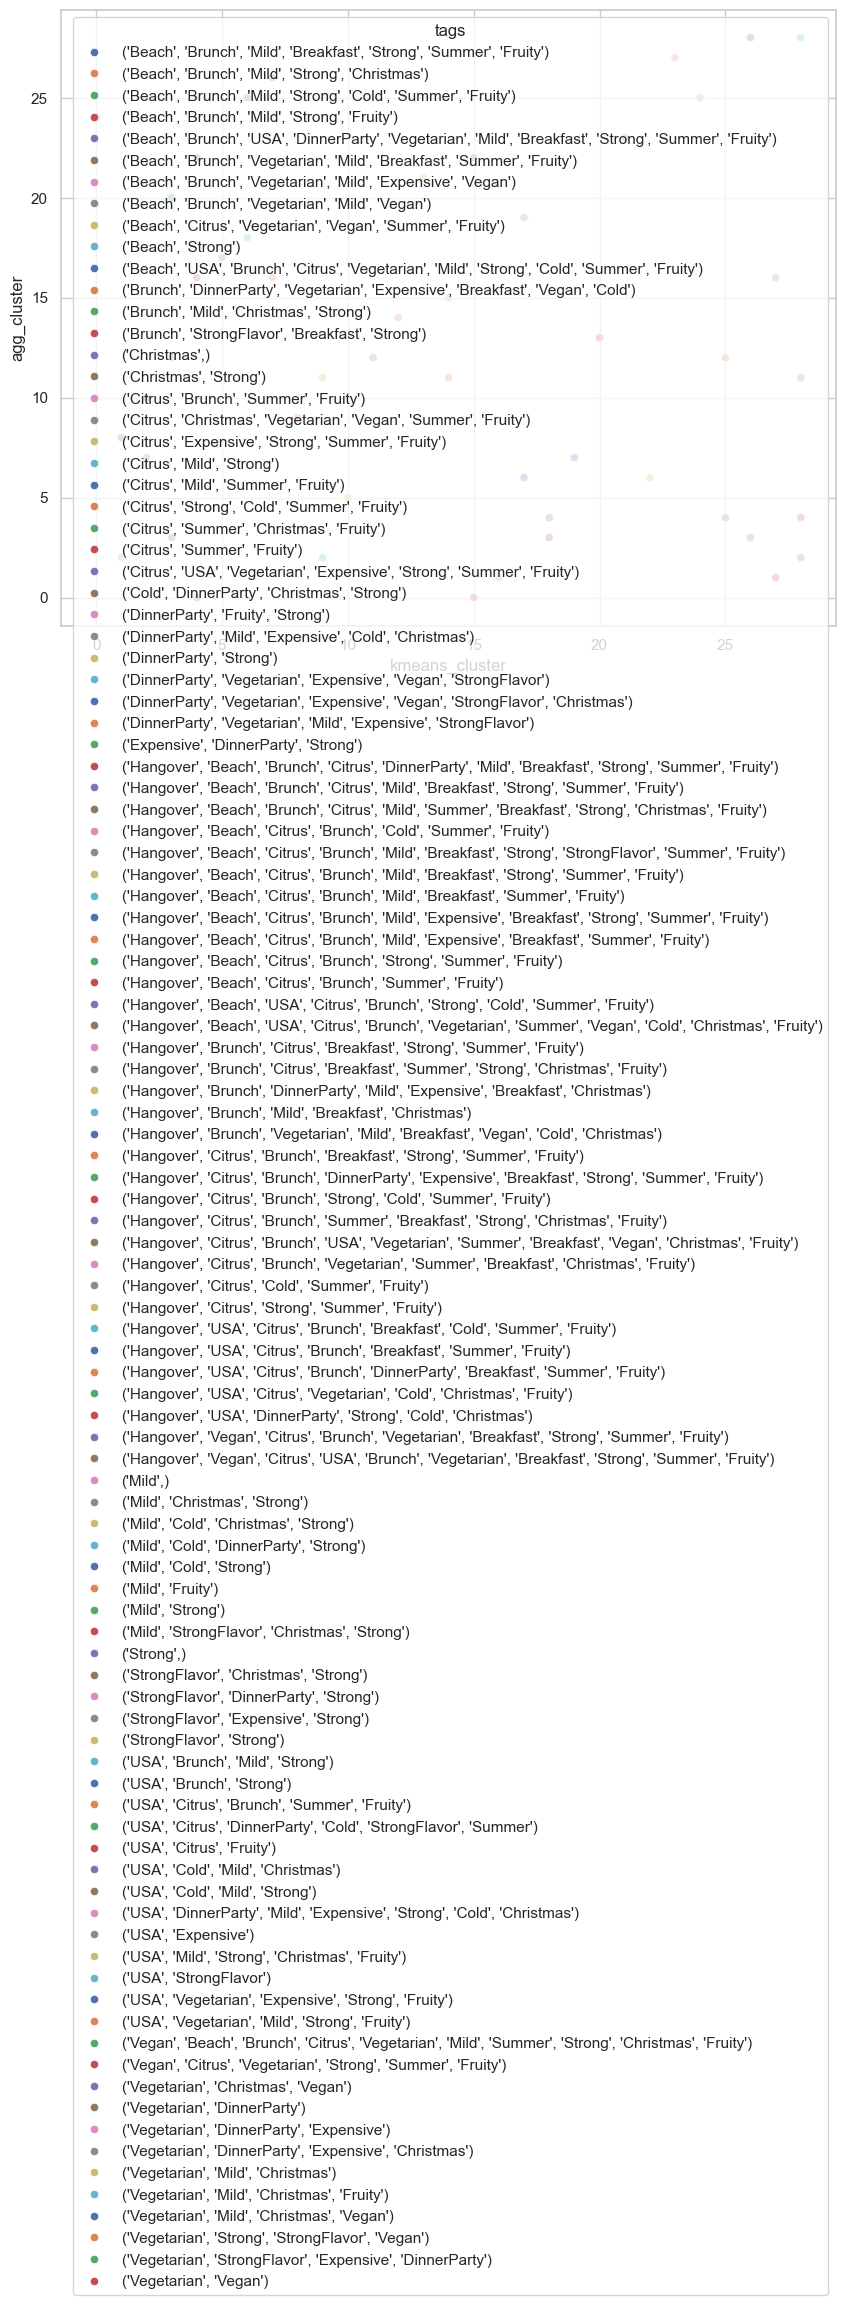

In [12]:
# Cell 7: Visualize the cocktails with a scatter plot focusing on K-Means clustering
plt.figure(figsize=(10, 8))

# Ensure tags are tuples or strings
cocktails['tags'] = cocktails['tags'].apply(lambda x: tuple(x) if isinstance(x, list) else x)

# Convert to categorical if you want to use the .cat accessor
cocktails['tags'] = cocktails['tags'].astype('category')

# Now create the scatter plot
sns.scatterplot(data=cocktails, x='kmeans_cluster', y='agg_cluster', hue='tags', palette='deep')
